### Importando os dados ###


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = 'https://raw.githubusercontent.com/henriqueschaeff/projeto/main/heart_disease.csv'
# importar ds

df = pd.read_csv(data)

df.head()

,idade,sexo,dor_toracia,pressao_arterial_em_repouso,colesterol,acucar_sangue_jejum,resultado_eletro,fc_maxima,angina,depressao_seg_st,inclinacao_st_exercicio,numero_vasos_coloridos_fluoroscopia,teste_stress_talio,diagnostico_dc,fisioterapia,obito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0,0.0,1
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0,1.0,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0,1.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0,0.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0,0.0,0


### Analise dos Dados

In [5]:
df['diagnostico_dc'].unique()

array([0., 2., 1., 3., 4.])

In [6]:
df['diagnostico_dc'].value_counts()

0.0    109
1.0     37
3.0     23
2.0     20
4.0     10
Name: diagnostico_dc, dtype: int64

In [7]:
df['fisioterapia'].value_counts()

1.0    173
0.0     26
Name: fisioterapia, dtype: int64

In [8]:
df['obito'].value_counts()

0    176
1     23
Name: obito, dtype: int64

In [9]:
# converter valores diferentes de zero em 1
df.loc[df.diagnostico_dc != 0, 'diagnostico_dc'] = 1


In [10]:
# variável diagnostico_dc depois
df.diagnostico_dc.value_counts()

0.0    109
1.0     90
Name: diagnostico_dc, dtype: int64

In [11]:
# obtendo o tamanho do dataframe

print('Número de entradas/pacientes:\t {}'.format(df.shape[0]))
print('Número de variáveis/atributos pessoais e médicos:\t {}'.format(df.shape[1]))

Número de entradas/pacientes:	 199
Número de variáveis/atributos pessoais e médicos:	 16


In [12]:
df.dtypes.sort_values()

obito                                    int64
idade                                  float64
sexo                                   float64
dor_toracia                            float64
pressao_arterial_em_repouso            float64
colesterol                             float64
acucar_sangue_jejum                    float64
resultado_eletro                       float64
fc_maxima                              float64
angina                                 float64
depressao_seg_st                       float64
inclinacao_st_exercicio                float64
numero_vasos_coloridos_fluoroscopia    float64
teste_stress_talio                     float64
diagnostico_dc                         float64
fisioterapia                           float64
dtype: object

In [13]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

numero_vasos_coloridos_fluoroscopia    0.010050
teste_stress_talio                     0.005025
idade                                  0.000000
sexo                                   0.000000
dor_toracia                            0.000000
pressao_arterial_em_repouso            0.000000
colesterol                             0.000000
acucar_sangue_jejum                    0.000000
resultado_eletro                       0.000000
fc_maxima                              0.000000
angina                                 0.000000
depressao_seg_st                       0.000000
inclinacao_st_exercicio                0.000000
diagnostico_dc                         0.000000
fisioterapia                           0.000000
obito                                  0.000000
dtype: float64

In [14]:
# quantas entradas são nulas

df[['numero_vasos_coloridos_fluoroscopia','teste_stress_talio']].isnull().sum()

numero_vasos_coloridos_fluoroscopia    2
teste_stress_talio                     1
dtype: int64

In [15]:
# criando uma cópia do dataframe
df_clean = df.copy()

# excluindo os valores ausentes
df_clean.dropna(subset = ['numero_vasos_coloridos_fluoroscopia'], inplace = True)
df_clean.dropna(subset = ['teste_stress_talio'], inplace = True)

# tamanho do novo dataframe
print('Número de entradas/pacientes:\t {}'.format(df_clean.shape[0]))
print('Número de variáveis/atributos pessoais e médicos:\t {}'.format(df_clean.shape[1]))

Número de entradas/pacientes:	 196
Número de variáveis/atributos pessoais e médicos:	 16


In [16]:
# dataset de variáveis numéricas
df_numer = df_clean[['idade', 'pressao_arterial_em_repouso', 'colesterol', 'fc_maxima', 'depressao_seg_st' ,'numero_vasos_coloridos_fluoroscopia']]

# dataset de variáveis categóricas
df_cat = df_clean[['sexo', 'dor_toracia', 'acucar_sangue_jejum', 'resultado_eletro', 'angina', 'inclinacao_st_exercicio', 'teste_stress_talio', 'diagnostico_dc', 'fisioterapia','obito']]

In [17]:
df_numer.describe()

,idade,pressao_arterial_em_repouso,colesterol,fc_maxima,depressao_seg_st,numero_vasos_coloridos_fluoroscopia
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,54.688776,132.209184,252.821429,151.071429,1.137755,0.704082
std,8.852644,17.660099,53.846922,22.330501,1.173469,0.978845
min,29.000000,94.000000,141.000000,88.000000,0.000000,0.000000
25%,48.000000,120.000000,218.500000,139.000000,0.000000,0.000000
50%,55.500000,130.000000,247.500000,154.500000,0.950000,0.000000
75%,61.000000,140.000000,282.250000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


In [18]:
df_cat.describe()

,sexo,dor_toracia,acucar_sangue_jejum,resultado_eletro,angina,inclinacao_st_exercicio,teste_stress_talio,diagnostico_dc,fisioterapia,obito
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,0.714286,3.158163,0.168367,1.122449,0.331633,1.632653,4.867347,0.454082,0.867347,0.117347
std,0.452911,0.950295,0.375150,0.995016,0.472005,0.638713,1.961882,0.499162,0.340068,0.322657
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000,0.000000
50%,1.000000,3.000000,0.000000,2.000000,0.000000,2.000000,3.000000,0.000000,1.000000,0.000000
75%,1.000000,4.000000,0.000000,2.000000,1.000000,2.000000,7.000000,1.000000,1.000000,0.000000
max,1.000000,4.000000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,1.000000,1.000000


### Visualização Gráfica

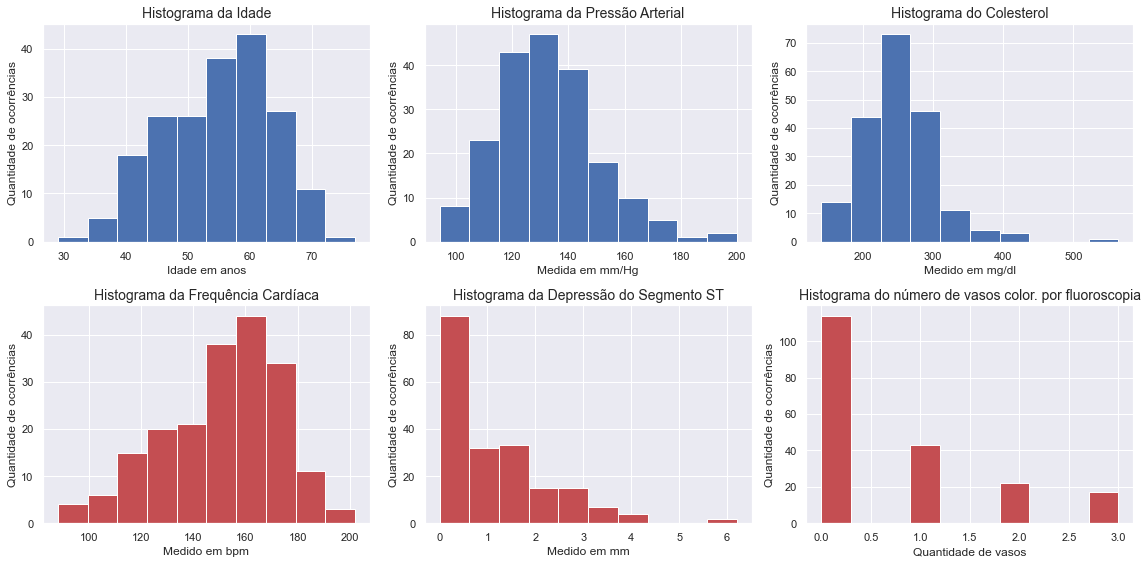

In [19]:
# importando biblioteca seaborn
import seaborn as sns
sns.set()

# plotando os histogramas

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,8))

# histograma age
df_numer['idade'].plot(kind="hist", ax=ax[0,0], color='b')
ax[0,0].set_title('Histograma da Idade', fontsize=14)
ax[0,0].set_ylabel('Quantidade de ocorrências')
ax[0,0].set_xlabel('Idade em anos', fontsize = 12)

# histograma trestbps
df_numer['pressao_arterial_em_repouso'].plot(kind="hist", ax=ax[0,1], color='b')
ax[0,1].set_title('Histograma da Pressão Arterial', fontsize=14)
ax[0,1].set_ylabel('Quantidade de ocorrências')
ax[0,1].set_xlabel('Medida em mm/Hg', fontsize = 12)

# histograma chol
df_numer['colesterol'].plot(kind="hist", ax=ax[0,2], color='b')
ax[0,2].set_title('Histograma do Colesterol', fontsize=14)
ax[0,2].set_ylabel('Quantidade de ocorrências')
ax[0,2].set_xlabel('Medido em mg/dl', fontsize = 12)

# histograma thalach
df_numer['fc_maxima'].plot(kind="hist", ax=ax[1,0], color='r')
ax[1,0].set_title('Histograma da Frequência Cardíaca',fontsize=14)
ax[1,0].set_ylabel('Quantidade de ocorrências')
ax[1,0].set_xlabel('Medido em bpm', fontsize = 12)

# histograma oldpeak
df_numer['depressao_seg_st'].plot(kind="hist", ax=ax[1,1], color='r')
ax[1,1].set_title('Histograma da Depressão do Segmento ST', fontsize=14)
ax[1,1].set_ylabel('Quantidade de ocorrências')
ax[1,1].set_xlabel('Medido em mm', fontsize = 12)

# histograma ca
df_numer['numero_vasos_coloridos_fluoroscopia'].plot(kind="hist", ax=ax[1,2], color='r')
ax[1,2].set_title('Histograma do número de vasos color. por fluoroscopia', fontsize=14)
ax[1,2].set_ylabel('Quantidade de ocorrências')
ax[1,2].set_xlabel('Quantidade de vasos', fontsize = 12)

fig.tight_layout();

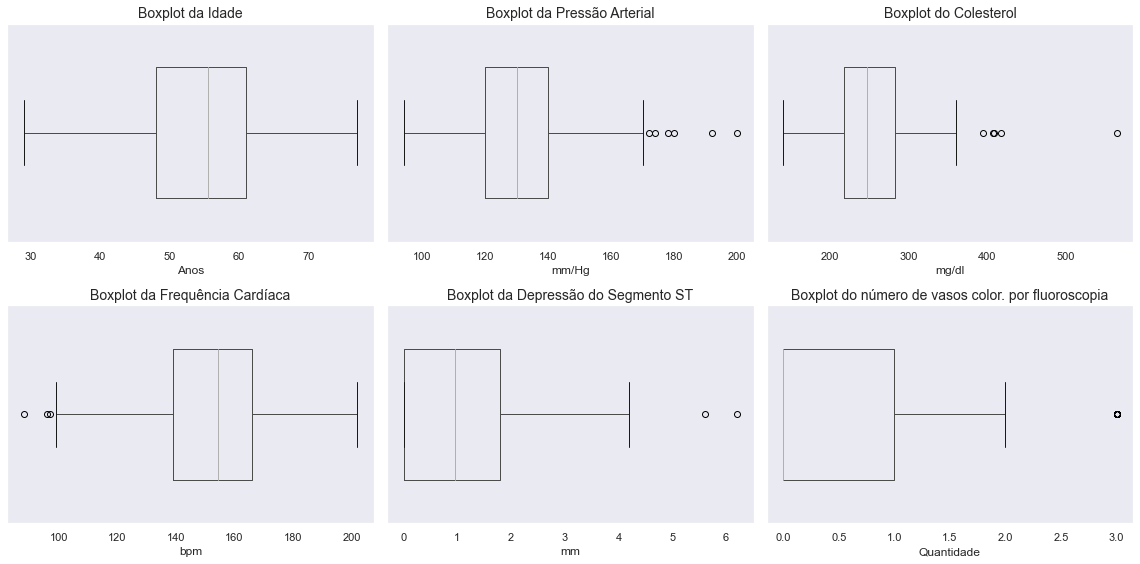

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,8))

# histograma age
df_numer.boxplot(['idade'], ax=ax[0,0], vert=False, widths=0.6, grid=False)
ax[0,0].set_yticks([])
ax[0,0].set_xlabel('Anos', fontsize = 12)
ax[0,0].set_title('Boxplot da Idade', fontsize=14)

# histograma trestbps
df_numer.boxplot(['pressao_arterial_em_repouso'], ax=ax[0,1], vert=False, widths=0.6, grid=False)
ax[0,1].set_yticks([])
ax[0,1].set_xlabel('mm/Hg', fontsize = 12)
ax[0,1].set_title('Boxplot da Pressão Arterial', fontsize=14)

# histograma chol
df_numer.boxplot(['colesterol'], ax=ax[0,2], vert=False, widths=0.6, grid=False)
ax[0,2].set_yticks([])
ax[0,2].set_xlabel('mg/dl', fontsize = 12)
ax[0,2].set_title('Boxplot do Colesterol', fontsize=14)

# histograma thalach
df_numer.boxplot(['fc_maxima'], ax=ax[1,0], vert=False, widths=0.6, grid=False)
ax[1,0].set_yticks([])
ax[1,0].set_xlabel('bpm', fontsize = 12)
ax[1,0].set_title('Boxplot da Frequência Cardíaca', fontsize=14)

# histograma oldpeak 
df_numer.boxplot(['depressao_seg_st'], ax=ax[1,1], vert=False, widths=0.6, grid=False)
ax[1,1].set_yticks([])
ax[1,1].set_xlabel('mm', fontsize = 12)
ax[1,1].set_title('Boxplot da Depressão do Segmento ST', fontsize=14)

# histograma ca 
df_numer.boxplot(['numero_vasos_coloridos_fluoroscopia'], ax=ax[1,2], vert=False, widths=0.6, grid=False)
ax[1,2].set_yticks([])
ax[1,2].set_xlabel('Quantidade', fontsize = 12)
ax[1,2].set_title('Boxplot do número de vasos color. por fluoroscopia', fontsize=14)

fig.tight_layout();

<ipython-input-21-1c6de1d554eb>:45: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


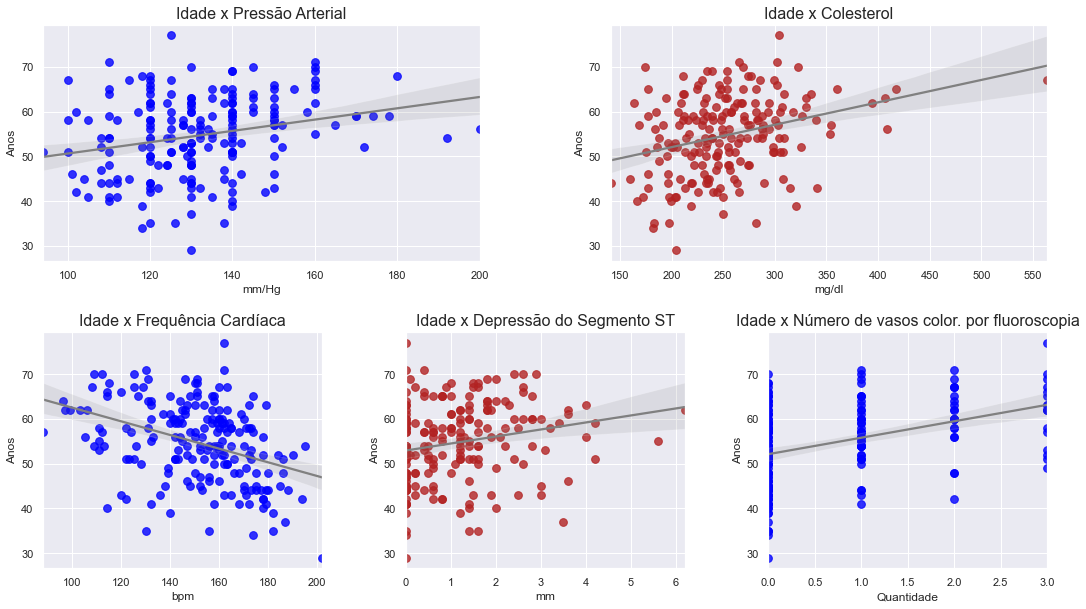

In [21]:
# plotar o gráfico de dispersão idade x demais variáveis
fig = plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# idade x pressao
ax1 = plt.subplot(221)
sns.regplot(y='idade', x='pressao_arterial_em_repouso', scatter_kws={'s': 60.0, 'color': 'blue'},
            line_kws={'color': 'gray'}, data=df_clean, ax=ax1)
ax1.set_title('Idade x Pressão Arterial', fontsize = 16)
ax1.set_ylabel('Anos')
ax1.set_xlabel('mm/Hg')

# idade x colesterol
ax2 = plt.subplot(222)
sns.regplot(y='idade', x='colesterol', scatter_kws={'s': 60.0, 'color': 'firebrick'},
            line_kws={'color': 'gray'}, data=df_clean, ax=ax2)
ax2.set_title('Idade x Colesterol', fontsize = 16)
ax2.set_ylabel('Anos')
ax2.set_xlabel('mg/dl')

# idade x fc_maxima
ax3 = plt.subplot(234)
sns.regplot(y='idade', x='fc_maxima', scatter_kws={'s': 60.0, 'color': 'blue'},
            line_kws={'color': 'gray'}, data=df_clean, ax=ax3)
ax3.set_title('Idade x Frequência Cardíaca', fontsize = 16)
ax3.set_ylabel('Anos')
ax3.set_xlabel('bpm')

# idade x depressao_seg_st
ax4 = plt.subplot(235)
sns.regplot(y='idade', x='depressao_seg_st', scatter_kws={'s': 60.0, 'color': 'firebrick'},
            line_kws={'color': 'gray'}, data=df_clean, ax=ax4)
ax4.set_title('Idade x Depressão do Segmento ST', fontsize = 16)
ax4.set_ylabel('Anos')
ax4.set_xlabel('mm')

# idade x numero_vasos_coloridos_fluoroscopia
ax5 = plt.subplot(236)
sns.regplot(y='idade', x='numero_vasos_coloridos_fluoroscopia', scatter_kws={'s': 60.0, 'color': 'blue'},
            line_kws={'color': 'gray'}, data=df_clean, ax=ax5)
ax5.set_title('Idade x Número de vasos color. por fluoroscopia', fontsize = 16)
ax5.set_ylabel('Anos')
ax5.set_xlabel('Quantidade')

fig.show()

In [24]:
!pip install pywaffle --trusted-host artifactory.produbanbr.corp --index-url http://artifactory.produbanbr.corp/artifactory/api/pypi/pypi-all/simple

from pywaffle import Waffle

Looking in indexes: http://artifactory.produbanbr.corp/artifactory/api/pypi/pypi-all/simple


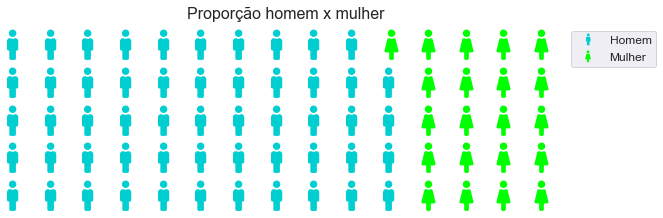

In [29]:
# extrair value counts da variavel ocorrencia_classificacao
sexo = df_cat['sexo'].value_counts().to_dict()

# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#00CED1", "#00FF00"),
                title={'label': 'Proporção homem x mulher',  'fontsize': 16},
                values=sexo, icons=('male','female'), icon_size=30, labels=('Homem','Mulher'),
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(10,6))
fig.set_tight_layout(False)
plt.show();

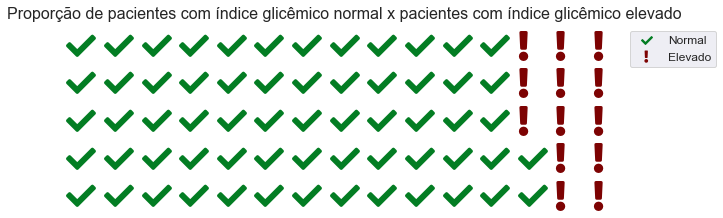

In [30]:
# extrair value counts da variavel ocorrencia_classificacao
asj = df_cat['acucar_sangue_jejum'].value_counts().to_dict()

# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#037D23","#7D0303"),
                title={'label': 'Proporção de pacientes com índice glicêmico normal x pacientes com índice glicêmico elevado',  'fontsize': 16},
                values=asj, icons=('check','exclamation'), icon_size=30,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                labels = ('Normal','Elevado'),
                icon_legend=True,
                figsize=(10,6))
fig.set_tight_layout(False)
plt.show();

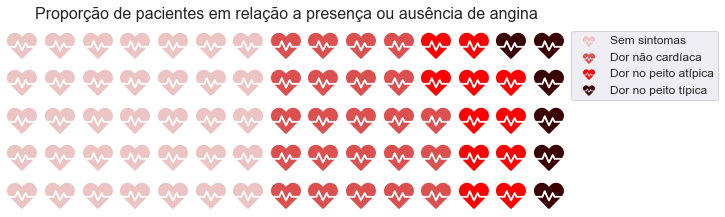

In [31]:
# extrair value counts da variavel ocorrencia_classificacao
dtc = df_cat['dor_toracia'].value_counts().to_dict()

# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#EDC4C4", "#DC5050","#FF0000","#390101"),
                title={'label': 'Proporção de pacientes em relação a presença ou ausência de angina',  'fontsize': 16},
                values=dtc, icons=('heartbeat'), icon_size=30, labels=('Sem sintomas','Dor não cardíaca','Dor no peito atípica','Dor no peito típica'),
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(10,6))
fig.set_tight_layout(False)
plt.show();

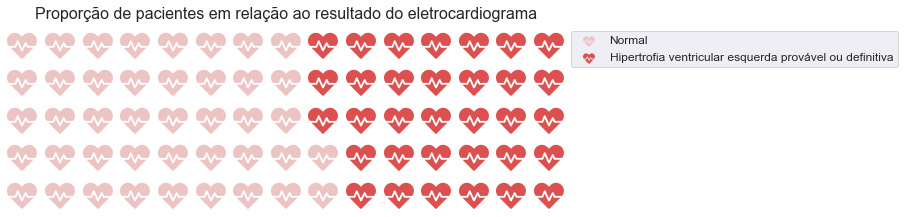

In [39]:
# extrair value counts da variavel ocorrencia_classificacao
restecg = df_cat['resultado_eletro'].value_counts().to_dict()

# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#EDC4C4", "#DC5050"),
                title={'label': 'Proporção de pacientes em relação ao resultado do eletrocardiograma',  'fontsize': 16},
                values=restecg, icons=('heartbeat'), icon_size=30,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                labels = ('Normal','Hipertrofia ventricular esquerda provável ou definitiva'),
                icon_legend=True,
                figsize=(10,6))
fig.set_tight_layout(False)
plt.show();

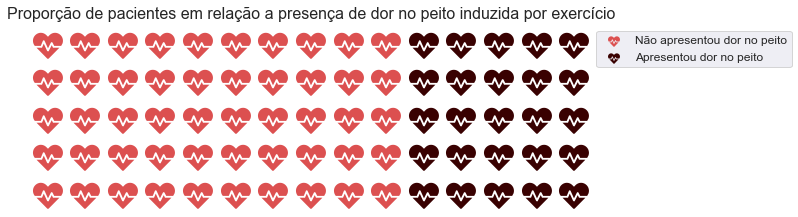

In [40]:
# extrair value counts da variavel ocorrencia_classificacao
angina = df_cat['angina'].value_counts().to_dict()

# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#DC5050","#390101"),
                title={'label': 'Proporção de pacientes em relação a presença de dor no peito induzida por exercício',  'fontsize': 16},
                values=angina, icons=('heartbeat'), icon_size=30,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                labels = ('Não apresentou dor no peito','Apresentou dor no peito'),
                icon_legend=True,
                figsize=(10,6))
fig.set_tight_layout(False)
plt.show();

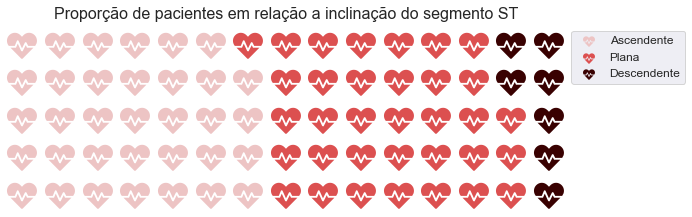

In [41]:
# extrair value counts da variavel ocorrencia_classificacao
ist = df_cat['inclinacao_st_exercicio'].value_counts().to_dict()

# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#EDC4C4","#DC5050","#390101"),
                title={'label': 'Proporção de pacientes em relação a inclinação do segmento ST',  'fontsize': 16},
                values=ist, icons=('heartbeat'), icon_size=30,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                labels = ('Ascendente','Plana','Descendente'),
                icon_legend=True,
                figsize=(10,6))
fig.set_tight_layout(False)
plt.show();

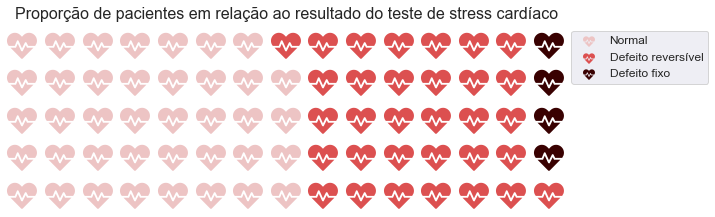

In [42]:
# extrair value counts da variavel ocorrencia_classificacao
thal = df_cat['teste_stress_talio'].value_counts().to_dict()

# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#EDC4C4","#DC5050","#390101"),
                title={'label': 'Proporção de pacientes em relação ao resultado do teste de stress cardíaco',  'fontsize': 16},
                values=thal, icons=('heartbeat'), icon_size=30,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                labels = ('Normal','Defeito reversível','Defeito fixo'),
                icon_legend=True,
                figsize=(10,6))
fig.set_tight_layout(False)
plt.show();

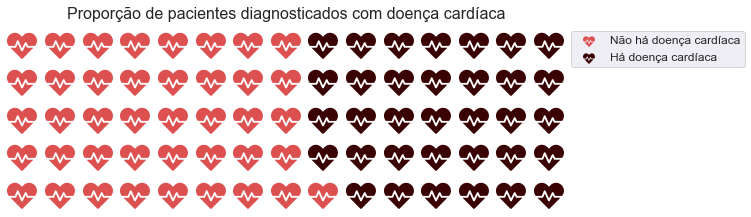

In [45]:
# extrair value counts da variavel ocorrencia_classificacao
ddc = df_cat['diagnostico_dc'].value_counts().to_dict()

# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#DC5050","#390101"),
                title={'label': 'Proporção de pacientes diagnosticados com doença cardíaca',  'fontsize': 16},
                values=ddc, icons='heartbeat', icon_size=30, labels=('Não há doença cardíaca','Há doença cardíaca'),
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(10,6))
fig.set_tight_layout(False)
plt.show();

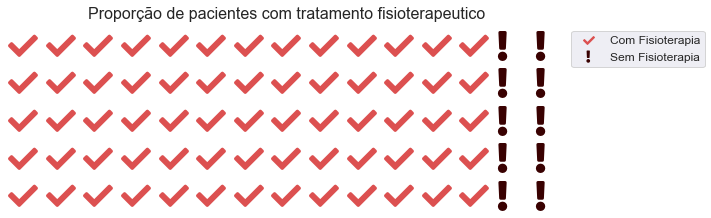

In [61]:
# extrair value counts da variavel ocorrencia_classificacao
fisioterapia = df_cat['fisioterapia'].value_counts().to_dict()

# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#DC5050","#390101"),
                title={'label': 'Proporção de pacientes com tratamento fisioterapeutico',  'fontsize': 16},
                values=fisioterapia, icons=('check','exclamation'), icon_size=30, labels=('Com Fisioterapia','Sem Fisioterapia'),
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(10,6))
fig.set_tight_layout(False)
plt.show();

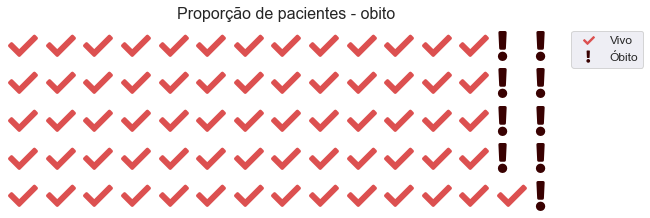

In [62]:
# extrair value counts da variavel ocorrencia_classificacao
obito = df_cat['obito'].value_counts().to_dict()

# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#DC5050","#390101"),
                title={'label': 'Proporção de pacientes - obito',  'fontsize': 16},
                values=obito, icons=('check','exclamation'), icon_size=30, labels=('Vivo','Óbito'),
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(10,6))
fig.set_tight_layout(False)
plt.show();

In [50]:
print('Pacientes diagnosticados como não tendo doença cardíaca:\t {}'.format(df['diagnostico_dc'].value_counts()[0]))
print('Pacientes diagnosticados como tendo doença cardíaca:\t {}'.format(df['diagnostico_dc'].value_counts()[1]))

Pacientes diagnosticados como não tendo doença cardíaca:	 109
Pacientes diagnosticados como tendo doença cardíaca:	 90


In [51]:
print('Pacientes que não tiveram fisioterapia:\t {}'.format(df['fisioterapia'].value_counts()[0]))
print('Pacientes que tiveram fisioterapia:\t {}'.format(df['fisioterapia'].value_counts()[1]))

Pacientes que não tiveram fisioterapia:	 26
Pacientes que tiveram fisioterapia:	 173


In [53]:
print('Pacientes que evoluiram bem:\t {}'.format(df['obito'].value_counts()[0]))
print('Pacientes que evoluiram ao óbito:\t {}'.format(df['obito'].value_counts()[1]))

Pacientes que evoluiram bem:	 176
Pacientes que evoluiram ao óbito:	 23


Text(0.5, 1.0, 'Histograma da Idade')

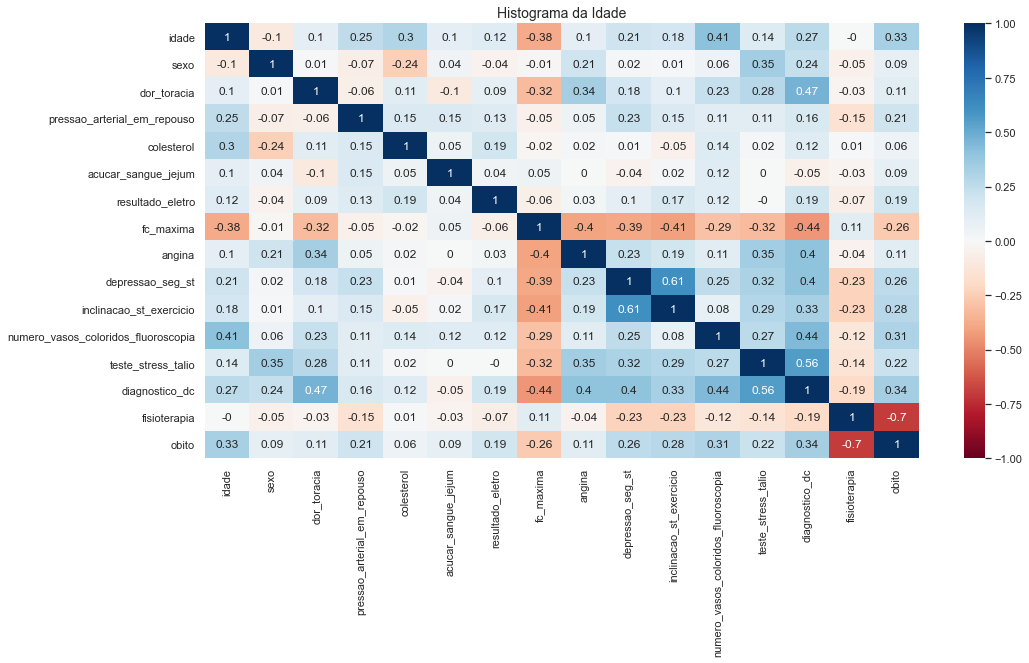

In [54]:
# heatmap (mapa de calor)
fig, ax = plt.subplots(figsize=(16,8))

corr = df_clean.corr().round(2)
sns.heatmap(corr, cmap='RdBu', linecolor='white', annot=True, ax=ax, vmin=-1.00, vmax= 1.00)
ax.set_title('Histograma da Idade', fontsize=14)

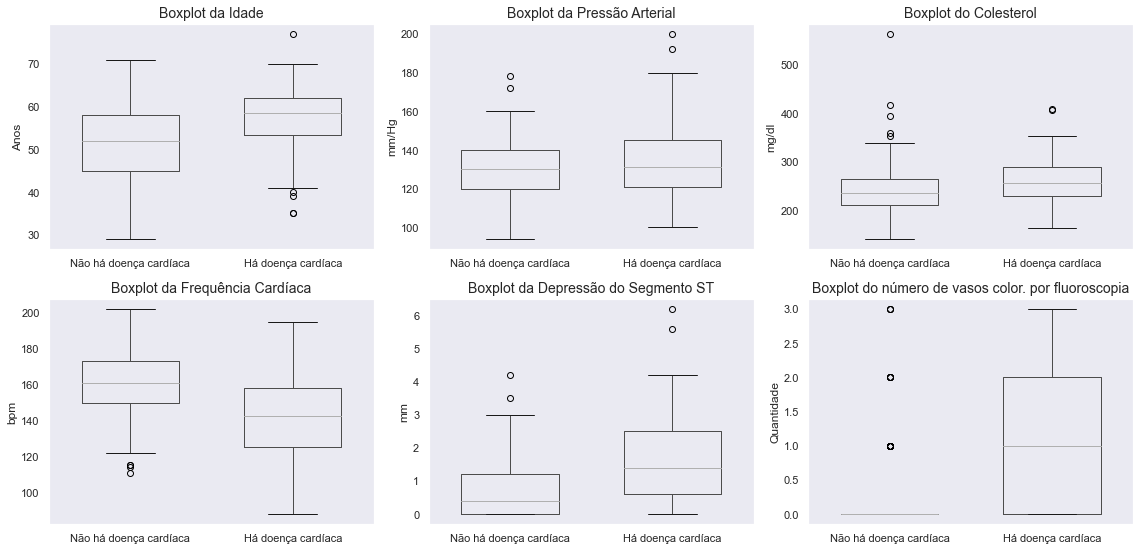

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# histograma age
df.boxplot('idade', ax=ax[0,0], widths=0.6, grid=False, by = 'diagnostico_dc')
ax[0,0].set_xticklabels(['Não há doença cardíaca','Há doença cardíaca'])
ax[0,0].set_ylabel('Anos', fontsize = 12)
ax[0,0].set_xlabel('')
ax[0,0].set_title('Boxplot da Idade', fontsize=14)
fig.suptitle('')

# histograma trestbps
df.boxplot(['pressao_arterial_em_repouso'], ax=ax[0,1], by = 'diagnostico_dc', widths=0.6, grid=False)
ax[0,1].set_xticklabels(['Não há doença cardíaca','Há doença cardíaca'])
ax[0,1].set_ylabel('mm/Hg', fontsize = 12)
ax[0,1].set_title('Boxplot da Pressão Arterial', fontsize=14)
ax[0,1].set_xlabel('')
fig.suptitle('')

# histograma chol
df.boxplot(['colesterol'], ax=ax[0,2], by = 'diagnostico_dc', widths=0.6, grid=False)
ax[0,2].set_xticklabels(['Não há doença cardíaca','Há doença cardíaca'])
ax[0,2].set_ylabel('mg/dl', fontsize = 12)
ax[0,2].set_title('Boxplot do Colesterol', fontsize=14)
ax[0,2].set_xlabel('')
fig.suptitle('')

# histograma thalach
df.boxplot(['fc_maxima'], ax=ax[1,0], by = 'diagnostico_dc', widths=0.6, grid=False)
ax[1,0].set_xticklabels(['Não há doença cardíaca','Há doença cardíaca'])
ax[1,0].set_ylabel('bpm', fontsize = 12)
ax[1,0].set_title('Boxplot da Frequência Cardíaca', fontsize=14)
ax[1,0].set_xlabel('')
fig.suptitle('')

# histograma oldpeak 
df.boxplot(['depressao_seg_st'], ax=ax[1,1], by = 'diagnostico_dc', widths=0.6, grid=False)
ax[1,1].set_xticklabels(['Não há doença cardíaca','Há doença cardíaca'])
ax[1,1].set_ylabel('mm', fontsize = 12)
ax[1,1].set_title('Boxplot da Depressão do Segmento ST', fontsize=14)
ax[1,1].set_xlabel('')
fig.suptitle('')

# histograma ca 
df.boxplot(['numero_vasos_coloridos_fluoroscopia'], ax=ax[1,2], by = 'diagnostico_dc', widths=0.6, grid=False)
ax[1,2].set_xticklabels(['Não há doença cardíaca','Há doença cardíaca'])
ax[1,2].set_ylabel('Quantidade', fontsize = 12)
ax[1,2].set_title('Boxplot do número de vasos color. por fluoroscopia', fontsize=14)
ax[1,2].set_xlabel('')
fig.suptitle('')

fig.tight_layout();

Text(0.5, 0.98, '')

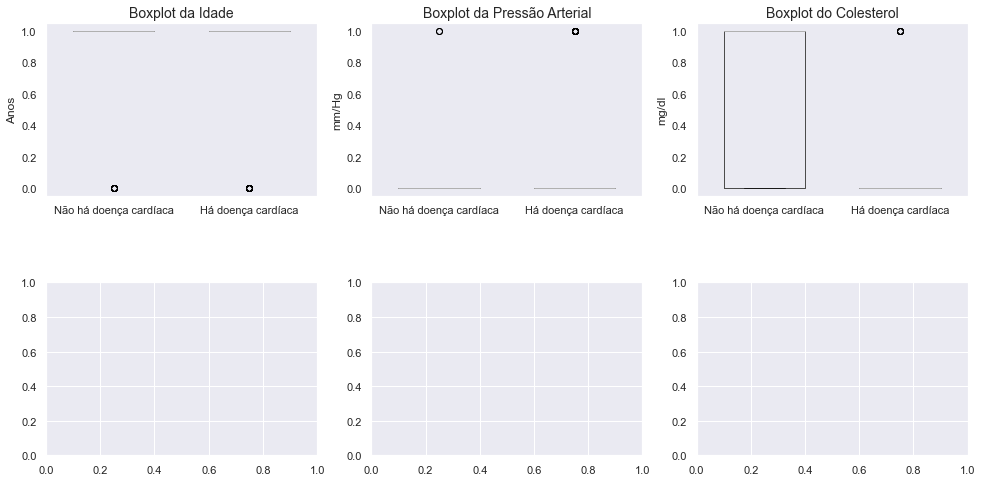

In [56]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# histograma age
df.boxplot('fisioterapia', ax=ax[0,0], widths=0.6, grid=False, by = 'diagnostico_dc')
ax[0,0].set_xticklabels(['Não há doença cardíaca','Há doença cardíaca'])
ax[0,0].set_ylabel('Anos', fontsize = 12)
ax[0,0].set_xlabel('')
ax[0,0].set_title('Boxplot da Idade', fontsize=14)
fig.suptitle('')

# histograma trestbps
df.boxplot(['obito'], ax=ax[0,1], by = 'diagnostico_dc', widths=0.6, grid=False)
ax[0,1].set_xticklabels(['Não há doença cardíaca','Há doença cardíaca'])
ax[0,1].set_ylabel('mm/Hg', fontsize = 12)
ax[0,1].set_title('Boxplot da Pressão Arterial', fontsize=14)
ax[0,1].set_xlabel('')
fig.suptitle('')

# histograma chol
df.boxplot(['obito'], ax=ax[0,2], by = 'fisioterapia', widths=0.6, grid=False)
ax[0,2].set_xticklabels(['Não há doença cardíaca','Há doença cardíaca'])
ax[0,2].set_ylabel('mg/dl', fontsize = 12)
ax[0,2].set_title('Boxplot do Colesterol', fontsize=14)
ax[0,2].set_xlabel('')
fig.suptitle('')


Text(0.5, 1.0, 'Fisioterapia x óbito')

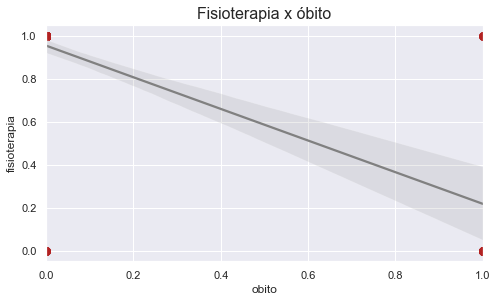

In [59]:
 #plotar o gráfico de dispersão age x demais variáveis
fig = plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# age x trestbps
ax1 = plt.subplot(221)
sns.regplot(y='fisioterapia', x='obito', scatter_kws={'s': 60.0, 'color': 'firebrick'},
            line_kws={'color': 'gray'}, data=df_clean, ax=ax1)
ax1.set_title('Fisioterapia x óbito', fontsize = 16)



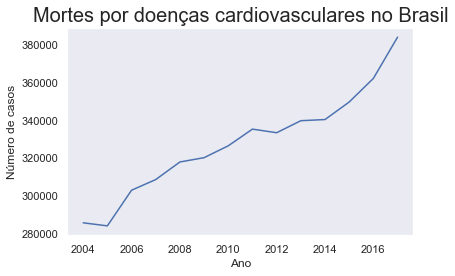

In [60]:
# extraindo os dados
df_html1 = pd.read_html('http://www.cardiometro.com.br/anteriores.asp')
df_brasil = df_html1[0]

# eliminando '*'
df_brasil['Mortes por doenças cardiovasculares'] = df_brasil['Mortes por doenças cardiovasculares'].str.strip('*')

# eliminando '.' e convertendo os strings em inteiros
df_brasil['Mortes por doenças cardiovasculares'] = ([x.replace('.','') for x in df_brasil['Mortes por doenças cardiovasculares']])
df_brasil['Mortes por doenças cardiovasculares'] = df_brasil['Mortes por doenças cardiovasculares'].astype(np.int) 

# invertendo o dataframe
df_brasil = df_brasil.reindex(index=df_brasil.index[::-1])

# setando o index
df_brasil = df_brasil.set_index(df_brasil['Ano'])
df_brasil.drop(['Ano'], axis=1, inplace=True)

# plotando o gráfico
fig, ax = plt.subplots()

df_brasil.plot(kind="line", ax=ax, legend = False, grid = False)
ax.set_title("Mortes por doenças cardiovasculares no Brasil", fontsize = 20)
ax.set_ylabel("Número de casos")
ax.set_xlabel("Ano")

plt.tight_layout()